In [9]:
import pandas as pd
file1_name = "user_table.csv"
file2_name = "home_page_table.csv"
file5_name = "payment_confirmation_table.csv"
file4_name = "payment_page_table.csv"
file3_name = "search_page_table.csv"
df_user =pd.read_csv(file1_name,parse_dates=["date"])

In [10]:
df_user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [12]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
user_id    90400 non-null int64
date       90400 non-null datetime64[ns]
device     90400 non-null object
sex        90400 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
df_user["date"].min()

Timestamp('2015-01-01 00:00:00')

In [14]:
df_user["date"].max()

Timestamp('2015-04-30 00:00:00')

In [15]:
df_home = pd.read_csv(file2_name)
df_home.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [16]:
df_search = pd.read_csv(file3_name)
df_search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [18]:
df_pay_visit = pd.read_csv(file4_name)
df_pay_visit.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [20]:
df_paid = pd.read_csv(file5_name)
df_paid.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [26]:
df_all = pd.merge(left = df_user, right = df_home, how='left', on ='user_id' )
df_all = pd.merge(left = df_all, right = df_search, how = 'left', on = 'user_id',suffixes=('_home','_search'))
df_all = pd.merge(left=df_all,right=df_pay_visit,how='left',on = "user_id")
df_all = pd.merge(left=df_all, right=df_paid,how='left',on ='user_id',suffixes=('_payment_visit','_paid'))
df_all.head()

,user_id,date,device,sex,page_home,page_search,page_payment_visit,page_paid
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


Data Analysis

Overall conversion rate

In [48]:
conver_rate = 1- pd.DataFrame(df_all.isnull().sum()).rename(columns={0:"conversion_rate"})/len(df_all)
conver_rate = conver_rate.reset_index()[4:]

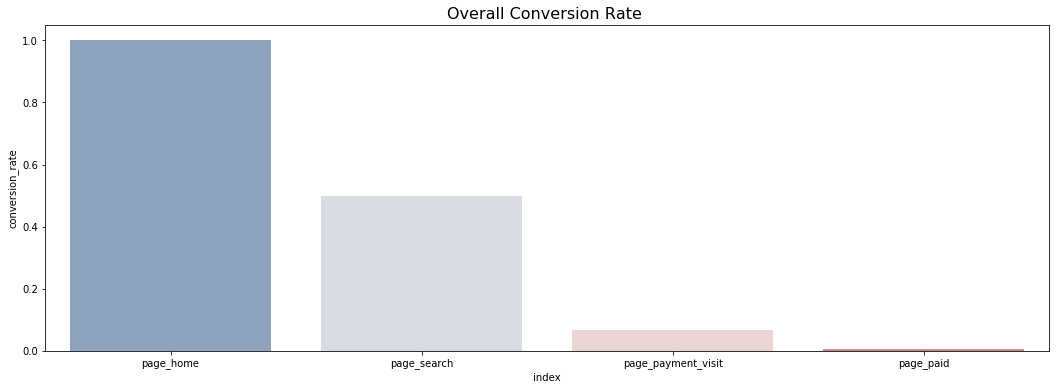

In [49]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots( figsize=(18, 6))
sns.barplot(x='index', y='conversion_rate', data=conver_rate, ax=ax,palette="vlag")
ax.set_title('Overall Conversion Rate ', fontsize=16)
plt.show()

In [57]:
def funnel_conv_rate(df):
    conv_rates=[]
    df_denominator = df[~df['page_home'].isnull()]
    conv_rates.append(1- df_denominator['page_search'].isnull().sum()/len(df_denominator))
    
    df_denominator = df[~df['page_search'].isnull()]
    conv_rates.append(1-df_denominator['page_payment_visit'].isnull().sum()/len(df_denominator))
    
    df_denominator = df[~df['page_payment_visit'].isnull()]
    conv_rates.append(1-df_denominator['page_paid'].isnull().sum()/len(df_denominator))
    
    return conv_rates


In [58]:
conversion_rates = funnel_conv_rate(df_all)
conversion_rates 

[0.5, 0.13340707964601772, 0.07495854063018237]

In [61]:
funnel_col = ['search/home','payment/search','paid/payment']
my_dict ={ 'funnel': ['search/home','payment/search','paid/payment'],'conversion rate':conversion_rates}
my_dict

{'funnel': ['search/home', 'payment/search', 'paid/payment'],
 'conversion rate': [0.5, 0.13340707964601772, 0.07495854063018237]}

In [65]:

overall_funnel_conv = pd.DataFrame.from_dict(my_dict) 

overall_funnel_conv.head()

,funnel,conversion rate
0,search/home,0.500000
1,payment/search,0.133407
2,paid/payment,0.074959


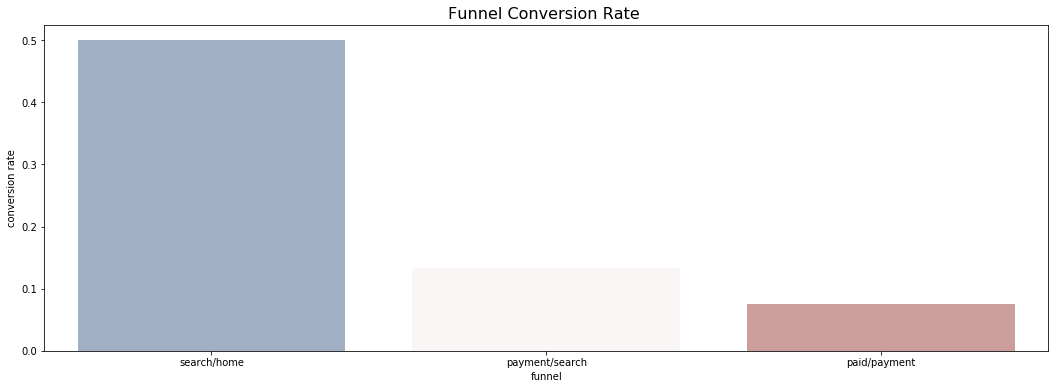

In [67]:
fig, ax = plt.subplots( figsize=(18, 6))
sns.barplot(x='funnel', y='conversion rate', data=overall_funnel_conv, ax=ax,palette="vlag")
ax.set_title('Funnel Conversion Rate ', fontsize=16)
plt.show()

Conversion rate by device

In [68]:
df_all['device'].unique()

array(['Desktop', 'Mobile'], dtype=object)

In [74]:
conversion_rates_desk = funnel_conv_rate(df_all[df_all['device']=='Desktop'])
conversion_rates_desk

[0.5, 0.09999999999999998, 0.04983388704318936]

In [76]:

conversion_rates_mobile = funnel_conv_rate(df_all[df_all['device']=='Mobile'])
conversion_rates_mobile

[0.5, 0.19999999999999996, 0.09999999999999998]

In [77]:
my_dict = { 'funnel':funnel_col, "conversion_rates_desk": conversion_rates_desk, "conversion_rates_mobile":conversion_rates_mobile  }
my_dict

{'funnel': ['search/home', 'payment/search', 'paid/payment'],
 'conversion_rates_desk': [0.5, 0.09999999999999998, 0.04983388704318936],
 'conversion_rates_mobile': [0.5, 0.19999999999999996, 0.09999999999999998]}

In [88]:
my_flat_dict =  { 'funnel':funnel_col+funnel_col, 'device':['Desktop','Desktop','Desktop','Mobile','Mobile','Mobile'], 'conversion rate': conversion_rates_desk + conversion_rates_mobile }
my_flat_dict

{'funnel': ['search/home',
  'payment/search',
  'paid/payment',
  'search/home',
  'payment/search',
  'paid/payment'],
 'device': ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile'],
 'conversion rate': [0.5,
  0.09999999999999998,
  0.04983388704318936,
  0.5,
  0.19999999999999996,
  0.09999999999999998]}

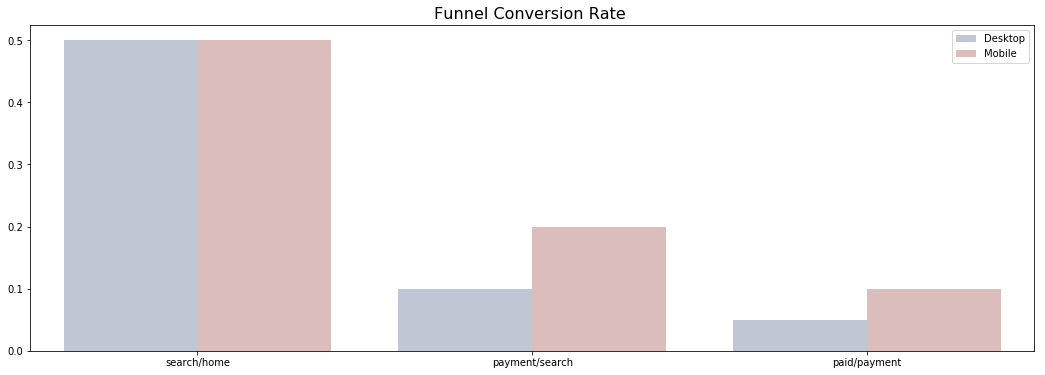

In [89]:
fig, ax = plt.subplots( figsize=(18, 6))
sns.barplot(x='funnel', y='conversion rate', data=my_flat_dict, hue='device' ,ax=ax,palette="vlag")
ax.set_title('Funnel Conversion Rate ', fontsize=16)
plt.show()

The conversion rates on destop user are much lower than on mobile user. Users might have difference experience on desktop than on mobile. Need to further investigate the user experience on desktop user and find the root cause, in order to improve funnel converstion rate.